In [41]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
columns_about_complexity = [
    "voc_simpson_index",
    "voc_shannon_entropy",
    "lex_avg_dependency_link_length",
    "voc_type_token_ratio",
    "voc_hapax_legomena",
    # "liwc_pronoun",
    # "liwc_affect",
    # "liwc_posemo",
    # "liwc_anger",
    # "liwc_sad",
    # "liwc_swear",
    # "liwc_social",
    # "liwc_death",
    # # "liwc_conversation",
    # # liwc_netspeak",
    # "liwc_assent",
    # "liwc_nonfl",
    # "liwc_filler",
    # "liwc_anx",
    # so far so good
]

In [43]:
def is_in_importants(column):
    for important_column in columns_about_complexity:
        if column.endswith(important_column):
            return True
    return False

# Analysis on the interdependence of trends between the AI-detection analysis, grammar_errors, and other stylistic features

In [44]:
papers_main_df = pd.read_csv("papers/cl_cv_papers_clean_similarities.csv")
reddit_main_df = pd.read_csv("reddit/reddit_clean_similarities.csv")
news_main_df = pd.read_csv("news/news_clean_similarities.csv")

# drop all the data that its year is before 2018
papers_main_df = papers_main_df[papers_main_df["year"] >= 2018]
reddit_main_df = reddit_main_df[reddit_main_df["year"] >= 2018]
news_main_df = news_main_df[news_main_df["year"] >= 2018]

In [45]:
for feature_index in range(len(columns_about_complexity)):
    selected_col = f"mean_{columns_about_complexity[feature_index]}"
    news_main_df["date"] = pd.to_datetime(
        news_main_df["year"].astype(str) + "-" + news_main_df["month"].astype(str)
    )
    values = (
        news_main_df[
            [
                "year",
                "month",
                *[f"mean_{col}" for col in columns_about_complexity],
            ]
        ][selected_col]
        .rolling(window=5)
        .mean()
    )

    values.bfill(inplace=True)

    news_main_df[selected_col] = values

news_main_df.drop(columns=["date"], inplace=True)

In [46]:
for feature_index in range(len(columns_about_complexity)):
    selected_col = f"mean_{columns_about_complexity[feature_index]}"
    papers_main_df["date"] = pd.to_datetime(
        papers_main_df["year"].astype(str) + "-" + papers_main_df["month"].astype(str)
    )
    values = (
        papers_main_df[
            [
                "year",
                "month",
                *[f"mean_{col}" for col in columns_about_complexity],
            ]
        ][selected_col]
        .rolling(window=5)
        .mean()
    )

    values.bfill(inplace=True)

    papers_main_df[selected_col] = values

papers_main_df.drop(columns=["date"], inplace=True)

In [47]:
for feature_index in range(len(columns_about_complexity)):
    selected_col = f"mean_{columns_about_complexity[feature_index]}"
    reddit_main_df["date"] = pd.to_datetime(
        reddit_main_df["year"].astype(str) + "-" + reddit_main_df["month"].astype(str)
    )
    values = (
        reddit_main_df[
            [
                "year",
                "month",
                *[f"mean_{col}" for col in columns_about_complexity],
            ]
        ][selected_col]
        .rolling(window=5)
        .mean()
    )

    values.bfill(inplace=True)

    reddit_main_df[selected_col] = values

reddit_main_df.drop(columns=["date"], inplace=True)

In [48]:
papers_grammar_errors_df = pd.read_csv("papers/cl_cv_papers_errors.csv")
news_grammar_errors_df = pd.read_csv("news/news_errors.csv")
reddit_errors_df = pd.read_csv("reddit/reddit_errors.csv")


papers_grammar_errors_df = papers_grammar_errors_df[
    papers_grammar_errors_df["year"] >= 2018
]
papers_grammar_errors_df = (
    papers_grammar_errors_df.groupby(["year", "month"])["num_errors"]
    .mean()
    .reset_index()
)
news_grammar_errors_df = news_grammar_errors_df[news_grammar_errors_df["year"] >= 2018]
news_grammar_errors_df = (
    news_grammar_errors_df.groupby(["year", "month"])["num_errors"].mean().reset_index()
)
reddit_errors_df = reddit_errors_df[reddit_errors_df["year"] >= 2018]
reddit_errors_df = (
    reddit_errors_df.groupby(["year", "month"])["num_errors"].mean().reset_index()
)

/var/folders/s6/_dcfmqnx4mxbhf22rbww8kwc0000gp/T/ipykernel_19847/3940610993.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [49]:
# num_thresholds = len(np.arange(0.78, 0.86, 0.01))
# num_rows = (num_thresholds + 2) // 3  # Round up division by 3

# fig, axes = plt.subplots(num_rows, 3, figsize=(20, 16 * num_rows))
# axes = axes.flatten()

# for i, papers_threshold in enumerate(np.arange(0.78, 0.86, 0.01)):
papers_threshold = 0.82
papers_ai_detection_df = pd.read_csv("papers/cl_cv_papers_ai_written.csv")

papers_ai_detection_df["ai_written"] = (
    papers_ai_detection_df["ai_written"] < papers_threshold
)

papers_ai_detection_df = papers_ai_detection_df[papers_ai_detection_df["year"] >= 2018]
papers_ai_detection_df = (
    papers_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

papers_ai_detection_df["date"] = pd.to_datetime(
    papers_ai_detection_df["year"].astype(str)
    + "-"
    + papers_ai_detection_df["month"].astype(str)
)

papers_ai_detection_df["ai_written"] = (
    papers_ai_detection_df["ai_written"].rolling(window=5).mean()
)

fig_px = (
    px.line(
        papers_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in Papers with threshold {papers_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)
fig_px.show()

#     # Convert plotly figure to matplotlib and place in subplot
#     fig_px.write_image(f"temp_fig_{i}.png")
#     img = plt.imread(f"temp_fig_{i}.png")
#     axes[i].imshow(img)
#     axes[i].axis("off")
#     os.remove(f"temp_fig_{i}.png")

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     axes[j].axis("off")

# plt.tight_layout()
# plt.show()

/var/folders/s6/_dcfmqnx4mxbhf22rbww8kwc0000gp/T/ipykernel_19847/2375400242.py:9: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [50]:
# num_thresholds = len(np.arange(0.81, 0.86, 0.01))
# num_rows = (num_thresholds + 2) // 3  # Round up division by 3

# fig, axes = plt.subplots(num_rows, 3, figsize=(20, 16 * num_rows))
# axes = axes.flatten()

# for i, news_threshold in enumerate(np.arange(0.81, 0.86, 0.01)):
news_threshold = 0.83
news_ai_detection_df = pd.read_csv("news/news_ai_written.csv")

news_ai_detection_df["ai_written"] = news_ai_detection_df["ai_written"] < news_threshold

news_ai_detection_df = news_ai_detection_df[news_ai_detection_df["year"] >= 2018]
news_ai_detection_df = (
    news_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

news_ai_detection_df["date"] = pd.to_datetime(
    news_ai_detection_df["year"].astype(str)
    + "-"
    + news_ai_detection_df["month"].astype(str)
)

news_ai_detection_df["ai_written"] = (
    news_ai_detection_df["ai_written"].rolling(window=5).mean()
)


fig_px = (
    px.line(
        news_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in News with threshold {news_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)
fig_px.show()

In [51]:
# num_thresholds = len(np.arange(0.84, 0.89, 0.01))
# num_rows = (num_thresholds + 2) // 3  # Round up division by 3

# fig, axes = plt.subplots(num_rows, 3, figsize=(20, 16 * num_rows))
# axes = axes.flatten()

# for i, reddit_threshold in enumerate(np.arange(0.84, 0.89, 0.01)):
reddit_threshold = 0.87
reddit_ai_detection_df = pd.read_csv("reddit/reddit_ai_written.csv")

reddit_ai_detection_df["ai_written"] = (
    reddit_ai_detection_df["ai_written"] < reddit_threshold
)

reddit_ai_detection_df = reddit_ai_detection_df[reddit_ai_detection_df["year"] >= 2018]
reddit_ai_detection_df = (
    reddit_ai_detection_df.groupby(["year", "month"])["ai_written"].mean().reset_index()
)

reddit_ai_detection_df["date"] = pd.to_datetime(
    reddit_ai_detection_df["year"].astype(str)
    + "-"
    + reddit_ai_detection_df["month"].astype(str)
)

reddit_ai_detection_df["ai_written"] = (
    reddit_ai_detection_df["ai_written"].rolling(window=5).mean()
)

fig_px = (
    px.line(
        reddit_ai_detection_df,
        x="date",
        y="ai_written",
        title=f"AI Written Detection in Reddit with threshold {reddit_threshold:.2f}",
        labels={"date": "Date", "ai_written": "AI Written Detection"},
    )
    .add_vline(
        x="2018-10-01",
        line_dash="dash",
        line_color="green",
    )
    .add_vline(
        x="2019-02-01",
        line_dash="dash",
        line_color="orange",
    )
    .add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    )
    .add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    )
    .add_annotation(
        x="2018-10-01",
        y=-0.1,
        text="BERT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2019-02-01",
        y=-0.2,
        text="GPT-2 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
    .add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    )
)

fig_px.show()

In [52]:
papers_merged_df = pd.merge(
    papers_main_df,
    papers_grammar_errors_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_errors"),
)
papers_merged_df = pd.merge(
    papers_merged_df,
    papers_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)

news_merged_df = pd.merge(
    news_main_df,
    news_grammar_errors_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_errors"),
)

news_merged_df = pd.merge(
    news_merged_df,
    news_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)


reddit_merged_df = pd.merge(
    reddit_main_df,
    reddit_errors_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_errors"),
)

reddit_merged_df = pd.merge(
    reddit_merged_df,
    reddit_ai_detection_df,
    on=["year", "month"],
    how="left",
    suffixes=("", "_ai"),
)

In [53]:
feature_to_look_at = "mean"

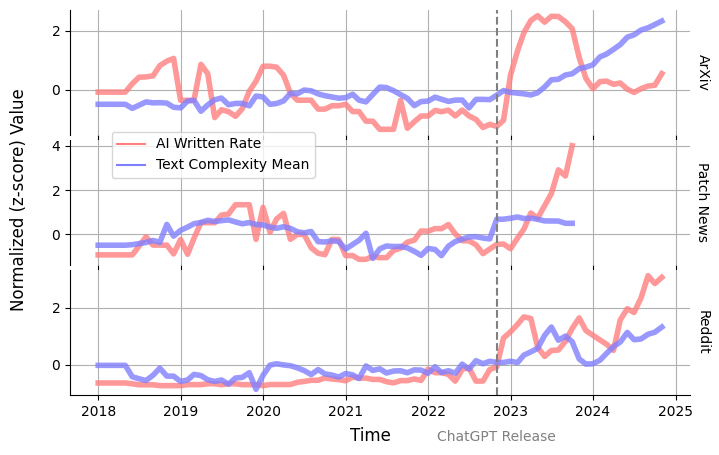

In [76]:
# import the standardscaler
from sklearn.preprocessing import StandardScaler

# just like the previous one, but this time, do one plot per source and show all the features plus the AI written thing in one plot. Do normalization to take into account the different scales for different features. Also, add vertical lines for the release dates of the models

complexity_features_to_colors = {
    "ai_written": "#ff7f7f",  # light salmon
    "complexity": "#7f7fff",
}

final_features = {}

feature_name_to_clean_label = {
    "ai_written": "AI Written Rate",
    "complexity": "Text Complexity Mean",
    "ChatGPT Release": "ChatGPT Release",
    "GPT-4 Release": "GPT-4 Release",
    "GPT-4o Release": "GPT-4o Release",
}

fig, axs = plt.subplots(3, 1, figsize=(8, 5), sharex=True)

for main_df, fig_title, ax in zip(
    [papers_merged_df, news_merged_df, reddit_merged_df],
    ["ArXiv", "Patch News", "Reddit"],
    axs,
):

    main_df = main_df.copy()

    normalized_values_dict = {}
    for feature in ["ai_written", *columns_about_complexity]:
        feature = f"mean_{feature}" if feature != "ai_written" else feature
        # feature_values = main_df[feature].rolling(window=5).mean().values
        feature_values = main_df[feature].values
        feature_value_for_nans_to_be_replaced = feature_values[
            ~np.isnan(feature_values)
        ][0]
        feature_values = np.where(
            np.isnan(feature_values),
            feature_value_for_nans_to_be_replaced,
            feature_values,
        )
        scaler = StandardScaler()

        normalized_values = scaler.fit_transform(
            feature_values.reshape(-1, 1)
        ).flatten()

        normalized_values_dict[feature] = normalized_values

    normalized_values_dict["complexity"] = np.mean(
        [
            normalized_values_dict["mean_voc_simpson_index"],
            normalized_values_dict["mean_voc_shannon_entropy"],
            normalized_values_dict["mean_lex_avg_dependency_link_length"],
            normalized_values_dict["mean_voc_type_token_ratio"],
            normalized_values_dict["mean_voc_hapax_legomena"],
        ],
        axis=0,
    )

    final_features[fig_title] = normalized_values_dict.copy()
    final_features[fig_title]["date"] = main_df["date"].values

    normalized_values_dict = {
        "ai_written": normalized_values_dict["ai_written"],
        "complexity": normalized_values_dict["complexity"],
    }

    for feature_name, feature_values in normalized_values_dict.items():
        ax.plot(
            main_df["date"],
            feature_values,
            label=feature_name_to_clean_label[feature_name.replace("mean_", "")],
            color=complexity_features_to_colors[
                (
                    feature_name[feature_name.find("_") + 1 :]
                    if "mean_" in feature_name
                    else feature_name
                )
            ],
            linewidth=4,
            alpha=0.8,
        )

    # Use actual dates instead of indices for the vertical lines

    chatgpt_date = pd.to_datetime("2022-11-01")  # https://openai.com/index/chatgpt/

    ax.axvline(x=chatgpt_date, color="grey", linestyle="--")

    if fig_title == "Reddit":

        ax.text(
            chatgpt_date,
            -2.8,
            "ChatGPT Release",
            verticalalignment="bottom",
            horizontalalignment="center",
            color="grey",
        )

    # drop the right and up spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # both x and y axis should have grids
    ax.grid(axis="both")

    # for the papers and news, remove the bottom spine
    if fig_title != "Reddit":
        ax.spines["bottom"].set_visible(False)
        # also remove the xtick labels
        # ax.set_xticklabels([])

    # put the name of the dataset on the right x axis label
    ax.text(
        1.02,
        0.5,
        fig_title,
        rotation=270,
        verticalalignment="center",
        horizontalalignment="center",
        transform=ax.transAxes,
    )

    # make a legend for the lines of the models with their colors and names
models_legend = []
for feature_name, color in complexity_features_to_colors.items():
    models_legend.append(
        plt.Line2D(
            [0],
            [0],
            color=color,
            label=feature_name_to_clean_label[feature_name],
            linestyle="--" if feature_name.endswith("Release") else "-",
        )
    )

# for the figure y axis label, put normalized (z-score) Value and for x axis label, put time
fig.supylabel("Normalized (z-score) Value", x=0.05)
fig.supxlabel("Time")
# draw this for the figure
fig.legend(
    handles=models_legend, loc="upper right", bbox_to_anchor=(0.44, 0.65), ncol=1
)

fig.subplots_adjust(hspace=0.04)
# plt.tight_layout()
plt.savefig(f"all_sources_complexity_trends_mean.png", dpi=900, bbox_inches="tight")
plt.show()